# Question Distribution Analysis
## Install the required packages

In [ ]:
! pip install pandas statsmodels numpy scikit-learn scipy seaborn

In [2]:
# Let's start by importing the necessary libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy import stats
from sklearn.preprocessing import StandardScaler

## Calculate Individual Question Distribution

In [29]:
import one_off

# # Approximately takes 4 hours to run to do the analysis
# question_distribution_df = one_off_qd.main()

# question_distribution_df

# Use the saved data to avoid running the code above
question_distribution_df = pd.read_csv('transcript_dfs/question_distribution_df.csv')

question_distribution_df.head()

,id,title,ae_name,ae_email,sales_outcome,date,meeting_attendees,host_email,transcript_url,video_url,...,ae_questions_per_segment,client_total_questions,client_question_ratio,client_questions_per_minute,client_first_question_timing_seconds,client_entropy,client_gini_coefficient,client_ave_time_between_questions_seconds,client_questions_per_segment,sales_outcome_binary
0,noufJNYz4sHSwwYc,Mohammad Nadeem Karim <> My Amazon Guy,Shawn Henderson,shawn.henderson@myamazonguy.com,closed_won,2023/07/24,"audray.alcordo@myamazonguy.com, shawn.henderso...",audray.alcordo@myamazonguy.com,https://app.fireflies.ai/view/noufJNYz4sHSwwYc,https://cdn.fireflies.ai/noufJNYz4sHSwwYc/vide...,...,"5, 8, 0, 2, 5, 2, 2, 1, 0, 0",16,0.43,0.40,299.34,0.759919,0.537500,135.59,"0, 2, 0, 0, 1, 1, 2, 1, 4, 5",1
1,iPxunfPaFxy32jXq,Chris Meet with My Amazon Guy,Shawn Henderson,shawn.henderson@myamazonguy.com,closed_won,2023/04/13,"heidelmanc@gmail.com, shawn.henderson@myamazon...",shawn.henderson@myamazonguy.com,https://app.fireflies.ai/view/iPxunfPaFxy32jXq,https://cdn.fireflies.ai/iPxunfPaFxy32jXq/vide...,...,"9, 5, 3, 2, 6, 3, 3, 3, 1, 1",0,0.00,0.00,NaN,NaN,NaN,NaN,"0, 0, 0, 0, 0, 0, 0, 0, 0, 0",1
2,WJ436UP28tj1eR4p,Chris Meet with My Amazon Guy,Shawn Henderson,shawn.henderson@myamazonguy.com,closed_won,2023/05/12,"heidelmanc@gmail.com, shawn.henderson@myamazon...",shawn.henderson@myamazonguy.com,https://app.fireflies.ai/view/WJ436UP28tj1eR4p,https://cdn.fireflies.ai/WJ436UP28tj1eR4p/vide...,...,"3, 0, 1, 4, 1, 0, 4, 3, 1, 2",32,0.66,0.52,2.59,0.854563,0.437500,105.81,"6, 1, 2, 1, 3, 3, 9, 2, 5, 0",1
3,trQWJhhuamfX6Yxz,Chris Meet with My Amazon Guy,Shawn Henderson,shawn.henderson@myamazonguy.com,closed_won,2023/03/16,"chris@mymopshop.com, shawn.henderson@myamazong...",shawn.henderson@myamazonguy.com,https://app.fireflies.ai/view/trQWJhhuamfX6Yxz,https://cdn.fireflies.ai/trQWJhhuamfX6Yxz/vide...,...,"4, 1, 0, 0, 1, 1, 2, 0, 1, 3",9,0.49,0.26,144.40,0.728307,0.544444,232.40,"2, 0, 0, 1, 0, 0, 1, 3, 1, 1",1
4,6SQGaUHHiwdrAvm1,kevin <> My Amazon Guy,John Aspinall,john.aspinall@myamazonguy.com,closed_won,2023/08/21,"sddrkevin@yahoo.com, john.aspinall@myamazonguy...",john.aspinall@myamazonguy.com,https://app.fireflies.ai/view/6SQGaUHHiwdrAvm1,https://cdn.fireflies.ai/6SQGaUHHiwdrAvm1/vide...,...,"5, 0, 1, 0, 0, 0, 1, 0, 2, 0",11,0.73,0.66,593.14,0.637605,0.645455,38.02,"0, 0, 0, 0, 0, 1, 1, 2, 3, 4",1


## Clean Data
I have cleaned the data by removing ratios that are either 0.0 or 1.0. These ratios are not useful for the analysis as they do not provide any information about a conversation between two people.

In [30]:
# Map 'sales_outcome' to binary using .loc to avoid SettingWithCopyWarning
question_distribution_df.loc[:, 'sales_outcome_binary'] = question_distribution_df['sales_outcome'].map({'closed_won': 1, 'closed_lost': 0})

# Remove rows that have 1.0 or 0.0 in the ae_talk_ratio column
question_distribution_df = question_distribution_df[(question_distribution_df['ae_talk_ratio'] != 1.0) & (question_distribution_df['ae_talk_ratio'] != 0.0)]

question_distribution_df.head()

,id,title,ae_name,ae_email,sales_outcome,date,meeting_attendees,host_email,transcript_url,video_url,...,ae_questions_per_segment,client_total_questions,client_question_ratio,client_questions_per_minute,client_first_question_timing_seconds,client_entropy,client_gini_coefficient,client_ave_time_between_questions_seconds,client_questions_per_segment,sales_outcome_binary
0,noufJNYz4sHSwwYc,Mohammad Nadeem Karim <> My Amazon Guy,Shawn Henderson,shawn.henderson@myamazonguy.com,closed_won,2023/07/24,"audray.alcordo@myamazonguy.com, shawn.henderso...",audray.alcordo@myamazonguy.com,https://app.fireflies.ai/view/noufJNYz4sHSwwYc,https://cdn.fireflies.ai/noufJNYz4sHSwwYc/vide...,...,"5, 8, 0, 2, 5, 2, 2, 1, 0, 0",16,0.43,0.40,299.34,0.759919,0.537500,135.59,"0, 2, 0, 0, 1, 1, 2, 1, 4, 5",1
2,WJ436UP28tj1eR4p,Chris Meet with My Amazon Guy,Shawn Henderson,shawn.henderson@myamazonguy.com,closed_won,2023/05/12,"heidelmanc@gmail.com, shawn.henderson@myamazon...",shawn.henderson@myamazonguy.com,https://app.fireflies.ai/view/WJ436UP28tj1eR4p,https://cdn.fireflies.ai/WJ436UP28tj1eR4p/vide...,...,"3, 0, 1, 4, 1, 0, 4, 3, 1, 2",32,0.66,0.52,2.59,0.854563,0.437500,105.81,"6, 1, 2, 1, 3, 3, 9, 2, 5, 0",1
3,trQWJhhuamfX6Yxz,Chris Meet with My Amazon Guy,Shawn Henderson,shawn.henderson@myamazonguy.com,closed_won,2023/03/16,"chris@mymopshop.com, shawn.henderson@myamazong...",shawn.henderson@myamazonguy.com,https://app.fireflies.ai/view/trQWJhhuamfX6Yxz,https://cdn.fireflies.ai/trQWJhhuamfX6Yxz/vide...,...,"4, 1, 0, 0, 1, 1, 2, 0, 1, 3",9,0.49,0.26,144.40,0.728307,0.544444,232.40,"2, 0, 0, 1, 0, 0, 1, 3, 1, 1",1
4,6SQGaUHHiwdrAvm1,kevin <> My Amazon Guy,John Aspinall,john.aspinall@myamazonguy.com,closed_won,2023/08/21,"sddrkevin@yahoo.com, john.aspinall@myamazonguy...",john.aspinall@myamazonguy.com,https://app.fireflies.ai/view/6SQGaUHHiwdrAvm1,https://cdn.fireflies.ai/6SQGaUHHiwdrAvm1/vide...,...,"5, 0, 1, 0, 0, 0, 1, 0, 2, 0",11,0.73,0.66,593.14,0.637605,0.645455,38.02,"0, 0, 0, 0, 0, 1, 1, 2, 3, 4",1
5,70F1yZvLPwgEn2i0,Ongaro Beauty <> My Amazon Guy,Shawn Henderson,shawn.henderson@myamazonguy.com,closed_won,2023/07/06,"airine.francisco@myamazonguy.com, brian@ongaro...",airine.francisco@myamazonguy.com,https://app.fireflies.ai/view/70F1yZvLPwgEn2i0,https://cdn.fireflies.ai/70F1yZvLPwgEn2i0/vide...,...,"9, 1, 6, 9, 7, 5, 7, 6, 7, 10",16,0.21,0.28,0.69,0.776001,0.512500,217.66,"4, 0, 3, 1, 0, 2, 4, 1, 0, 1",1


## Impute Missing Values

In [32]:
# List of variables for analysis
variables = [
    'ae_total_questions', 'ae_question_ratio', 'ae_questions_per_minute',
    'ae_first_question_timing_seconds', 'ae_entropy',
    'ae_ave_time_between_questions_seconds', 'client_total_questions',
    'client_questions_per_minute', 'client_first_question_timing_seconds',
    'client_entropy', 'client_ave_time_between_questions_seconds'
]

# Identify variables with missing values
variables_with_missing = [var for var in variables if question_distribution_df[var].isnull().any()]

# Impute missing values with median
for var in variables_with_missing:
    median_value = question_distribution_df[var].median()
    question_distribution_df[var].fillna(median_value, inplace=True)
    print(f"Imputed missing values in '{var}' with median value: {median_value}")

# Verify that there are no missing values
print("\nAfter imputation, missing values per variable:")
print(question_distribution_df[variables].isnull().sum())



After imputation, missing values per variable:
ae_total_questions                           0
ae_question_ratio                            0
ae_questions_per_minute                      0
ae_first_question_timing_seconds             0
ae_entropy                                   0
ae_ave_time_between_questions_seconds        0
client_total_questions                       0
client_questions_per_minute                  0
client_first_question_timing_seconds         0
client_entropy                               0
client_ave_time_between_questions_seconds    0
dtype: int64


## Correlation Analysis

In [33]:
# Identify variables (columns) that have any missing values (None or NaN)
variables_with_missing = [var for var in variables if question_distribution_df[var].isnull().any()]

if variables_with_missing:
    print("The following variables have missing values and will be excluded from analysis:")
    for var in variables_with_missing:
        missing_count = question_distribution_df[var].isnull().sum()
        print(f"Variable '{var}' has {missing_count} missing values.")
    # Remove variables with missing values from the list
    variables = [var for var in variables if var not in variables_with_missing]
else:
    print("No variables with missing values found.")

# Ensure there are no missing values in the target variable
question_distribution_df = question_distribution_df.dropna(subset=['sales_outcome_binary'])

# Identify and remove constant variables
constant_vars = [var for var in variables if question_distribution_df[var].nunique() <= 1]

if constant_vars:
    print("\nThe following variables are constant and will be excluded from analysis:")
    for var in constant_vars:
        unique_value = question_distribution_df[var].unique()[0]
        print(f"Variable '{var}' is constant with value: {unique_value}")
    # Remove constant variables from the list
    variables = [var for var in variables if var not in constant_vars]
else:
    print("\nNo constant variables found.")

# Proceed with the correlation calculation using the updated 'variables' list
corr_list = []

for var in variables:
    try:
        corr_coef, p_value = stats.pearsonr(question_distribution_df[var], question_distribution_df['sales_outcome_binary'])
        corr_list.append({
            'Variable': var,
            'Correlation with Sales Outcome': corr_coef,
            'P-value (Correlation)': p_value
        })
    except Exception as e:
        print(f"An error occurred while processing variable '{var}': {e}")

# Create a DataFrame from the correlation results
corr_df = pd.DataFrame(corr_list)

# Display the correlation DataFrame
print("\nCorrelation Results:")
print(corr_df)


No variables with missing values found.

No constant variables found.

Correlation Results:
                                     Variable  Correlation with Sales Outcome  \
0                          ae_total_questions                        0.014437   
1                           ae_question_ratio                       -0.069718   
2                     ae_questions_per_minute                       -0.118793   
3            ae_first_question_timing_seconds                        0.037300   
4                                  ae_entropy                        0.019882   
5       ae_ave_time_between_questions_seconds                        0.072332   
6                      client_total_questions                        0.102233   
7                 client_questions_per_minute                       -0.009610   
8        client_first_question_timing_seconds                       -0.001217   
9                              client_entropy                        0.100470   
10  client_ave_ti

## Logistic Regression

In [34]:
# Logistic Regression
# Define predictors and target variable
X = question_distribution_df[variables]
y = question_distribution_df['sales_outcome_binary']

# Standardize the predictors
scaler = StandardScaler()
X_scaled_array = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled_array, columns=X.columns, index=X.index)

# Add constant term for intercept
X_scaled = sm.add_constant(X_scaled)

# Align X_scaled and y to ensure indices match
X_scaled, y = X_scaled.align(y, join='inner', axis=0)

# Fit the logistic regression model
logit_model = sm.Logit(y, X_scaled)
result = logit_model.fit(method='newton', maxiter=100)

# Get the summary of regression results
regression_summary = result.summary2().tables[1]
print(result.summary2())



Optimization terminated successfully.
         Current function value: 0.587155
         Iterations 6
                                      Results: Logit
Model:                     Logit                       Method:                  MLE       
Dependent Variable:        sales_outcome_binary        Pseudo R-squared:        0.027     
Date:                      2024-10-21 11:00            AIC:                     2483.0051 
No. Observations:          2094                        BIC:                     2550.7670 
Df Model:                  11                          Log-Likelihood:          -1229.5   
Df Residuals:              2082                        LL-Null:                 -1263.4   
Converged:                 1.0000                      LLR p-value:             3.3419e-10
No. Iterations:            6.0000                      Scale:                   1.0000    
------------------------------------------------------------------------------------------
                          

In [35]:
# Calculate VIF for each variable
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming X_scaled is your predictors DataFrame
vif_data = pd.DataFrame()
vif_data['Variable'] = X_scaled.columns
vif_data['VIF'] = [variance_inflation_factor(X_scaled.values, i) for i in range(X_scaled.shape[1])]

print(vif_data)


                                     Variable       VIF
0                                       const  1.000000
1                          ae_total_questions  3.866599
2                           ae_question_ratio  4.547887
3                     ae_questions_per_minute  3.524972
4            ae_first_question_timing_seconds  1.081438
5                                  ae_entropy  2.138496
6       ae_ave_time_between_questions_seconds  1.930111
7                      client_total_questions  3.076289
8                 client_questions_per_minute  3.484754
9        client_first_question_timing_seconds  1.285873
10                             client_entropy  2.415357
11  client_ave_time_between_questions_seconds  1.680729


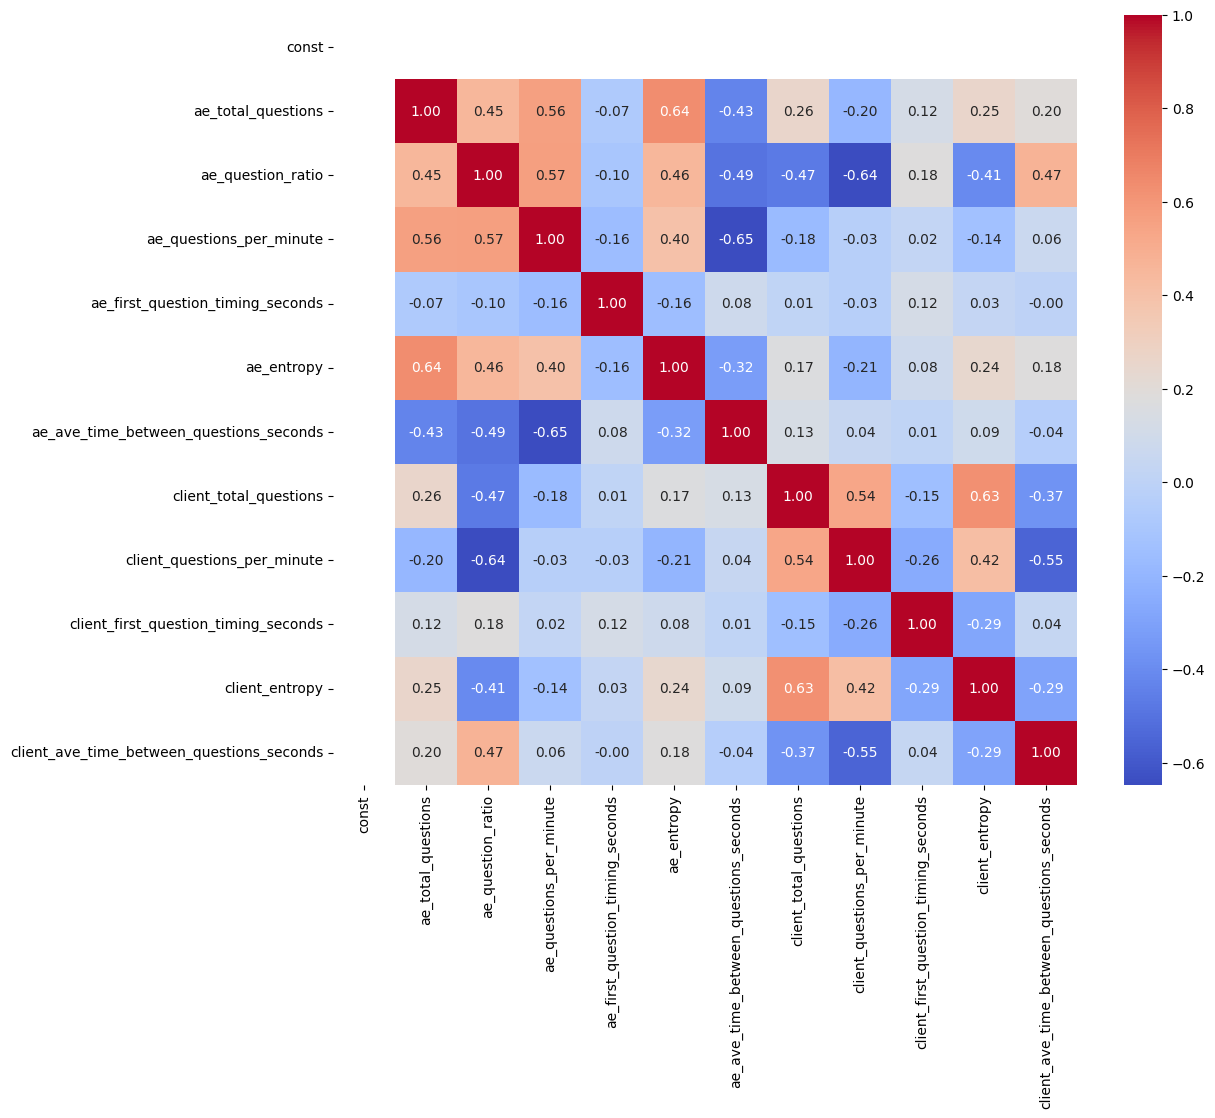

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = X_scaled.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()


## Regression Coefficients and P-values

In [37]:
# Prepare regression results
regression_df = regression_summary.reset_index()
regression_df.rename(columns={
    'index': 'Variable',
    'Coef.': 'Regression Coefficient',
    'P>|z|': 'P-value (Regression)'
}, inplace=True)

# Remove 'const' from the variables
regression_df = regression_df[regression_df['Variable'] != 'const']

## Interpret Results

In [38]:
# Merge correlation and regression data
merged_df = pd.merge(
    corr_df,
    regression_df[['Variable', 'Regression Coefficient', 'P-value (Regression)']],
    on='Variable',
    how='left'
)

# Define interpretation based on p-value
def interpret_p_value(p_value):
    if pd.isnull(p_value):
        return 'N/A'
    elif p_value < 0.05:
        return 'Good Predictor'
    else:
        return 'Not a Good Predictor'

# Apply the interpretation to the merged DataFrame
merged_df['Interpretation'] = merged_df['P-value (Regression)'].apply(interpret_p_value)

## Present Results

In [41]:
# Rearranging columns for presentation
final_df = merged_df[[
    'Variable',
    'Correlation with Sales Outcome',
    'P-value (Correlation)',
    'Regression Coefficient',
    'P-value (Regression)',
    'Interpretation'
]]

# Format numerical values for better readability
final_df['Correlation with Sales Outcome'] = final_df['Correlation with Sales Outcome'].round(4)
final_df['P-value (Correlation)'] = final_df['P-value (Correlation)'].apply(lambda x: f"{x:.3f}")
final_df['Regression Coefficient'] = final_df['Regression Coefficient'].round(4)
final_df['P-value (Regression)'] = final_df['P-value (Regression)'].apply(lambda x: f"{x:.3f}" if not pd.isnull(x) else 'N/A')

# Display the final table
final_df

,Variable,Correlation with Sales Outcome,P-value (Correlation),Regression Coefficient,P-value (Regression),Interpretation
0,ae_total_questions,0.0144,0.509,0.1115,0.281,Not a Good Predictor
1,ae_question_ratio,-0.0697,0.001,-0.0518,0.623,Not a Good Predictor
2,ae_questions_per_minute,-0.1188,0.000,-0.3634,0.001,Good Predictor
3,ae_first_question_timing_seconds,0.0373,0.088,0.0265,0.581,Not a Good Predictor
4,ae_entropy,0.0199,0.363,0.0448,0.533,Not a Good Predictor
5,ae_ave_time_between_questions_seconds,0.0723,0.001,-0.0424,0.537,Not a Good Predictor
6,client_total_questions,0.1022,0.000,0.1264,0.143,Not a Good Predictor
7,client_questions_per_minute,-0.0096,0.660,-0.1785,0.090,Not a Good Predictor
8,client_first_question_timing_seconds,-0.0012,0.956,0.0114,0.837,Not a Good Predictor
9,client_entropy,0.1005,0.000,0.1455,0.072,Not a Good Predictor
